In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
iris = fetch_ucirepo(id=53)

# data (as pandas dataframes)
X = iris.data.features
y = iris.data.targets

# metadata
print(iris.metadata)

# variable information
print(iris.variables)

{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'published_in': 'Significance, 2021', 'year': 2021, 'url': 'https://www.semanticscholar.org/paper/4599862ea877863669a6a8e63a3c707a787d5d7e', 'doi': '1740-9713.01589'}, 'add

In [ ]:
url = "https://archive.ics.uci.edu/static/public/53/data.csv"
df = pd.read_csv(url)

In [ ]:
X = df.drop(columns=['class'])  # Features are all columns except 'class'
y = df['class']

In [ ]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (150, 4)
Shape of y: (150,)


In [ ]:
print("\nFirst few rows of X:")
print(X.head())


First few rows of X:
   sepal length  sepal width  petal length  petal width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


In [ ]:
print("\nFirst few rows of y:")
print(y.head())


First few rows of y:
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: class, dtype: object


In [ ]:
import numpy as np

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes to verify
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (120, 4)
Shape of X_test: (30, 4)
Shape of y_train: (120,)
Shape of y_test: (30,)


In [ ]:
print("\nFirst few rows of X_train:")
print(X_train.head())

print("\nFirst few rows of X_test:")
print(X_test.head())

print("\nFirst few rows of y_train:")
print(y_train.head())

print("\nFirst few rows of y_test:")
print(y_test.head())


First few rows of X_train:
    sepal length  sepal width  petal length  petal width
22           4.6          3.6           1.0          0.2
15           5.7          4.4           1.5          0.4
65           6.7          3.1           4.4          1.4
11           4.8          3.4           1.6          0.2
42           4.4          3.2           1.3          0.2

First few rows of X_test:
     sepal length  sepal width  petal length  petal width
73            6.1          2.8           4.7          1.2
18            5.7          3.8           1.7          0.3
118           7.7          2.6           6.9          2.3
78            6.0          2.9           4.5          1.5
76            6.8          2.8           4.8          1.4

First few rows of y_train:
22        Iris-setosa
15        Iris-setosa
65    Iris-versicolor
11        Iris-setosa
42        Iris-setosa
Name: class, dtype: object

First few rows of y_test:
73     Iris-versicolor
18         Iris-setosa
118     Iris-virg

In [ ]:
import numpy as np

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

def predict(X_train, y_train, X_test, k):
    y_pred = []

    for test_point in X_test:
        distances = [euclidean_distance(test_point, train_point) for train_point in X_train]
        k_indices = np.argsort(distances)[:k]
        k_nearest_labels = [y_train[i] for i in k_indices]

        # Convert labels to numerical values
        label_mapping = {label: i for i, label in enumerate(np.unique(y_train))}
        k_nearest_labels_numeric = [label_mapping[label] for label in k_nearest_labels]

        most_common = np.bincount(k_nearest_labels_numeric).argmax()
        y_pred.append(list(label_mapping.keys())[list(label_mapping.values()).index(most_common)])

    return np.array(y_pred)

# Test the model
k_values = [1, 3, 5, 7, 9]  # Different values of K to test

for k in k_values:
    # Predictions for the test set
    y_pred = predict(X_train.values, y_train.values, X_test.values, k)

    # Calculate accuracy
    acc = accuracy(y_test.values, y_pred)
    print(f"\nAccuracy for k={k}: {acc:.4f}")

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test.values, y_pred)
    print(f"Confusion Matrix for k={k}:\n{conf_matrix}")



Accuracy for k=1: 1.0000
Confusion Matrix for k=1:
[[10.  0.  0.]
 [ 0.  9.  0.]
 [ 0.  0. 11.]]

Accuracy for k=3: 1.0000
Confusion Matrix for k=3:
[[10.  0.  0.]
 [ 0.  9.  0.]
 [ 0.  0. 11.]]

Accuracy for k=5: 1.0000
Confusion Matrix for k=5:
[[10.  0.  0.]
 [ 0.  9.  0.]
 [ 0.  0. 11.]]

Accuracy for k=7: 0.9667
Confusion Matrix for k=7:
[[10.  0.  0.]
 [ 0.  8.  1.]
 [ 0.  0. 11.]]

Accuracy for k=9: 1.0000
Confusion Matrix for k=9:
[[10.  0.  0.]
 [ 0.  9.  0.]
 [ 0.  0. 11.]]


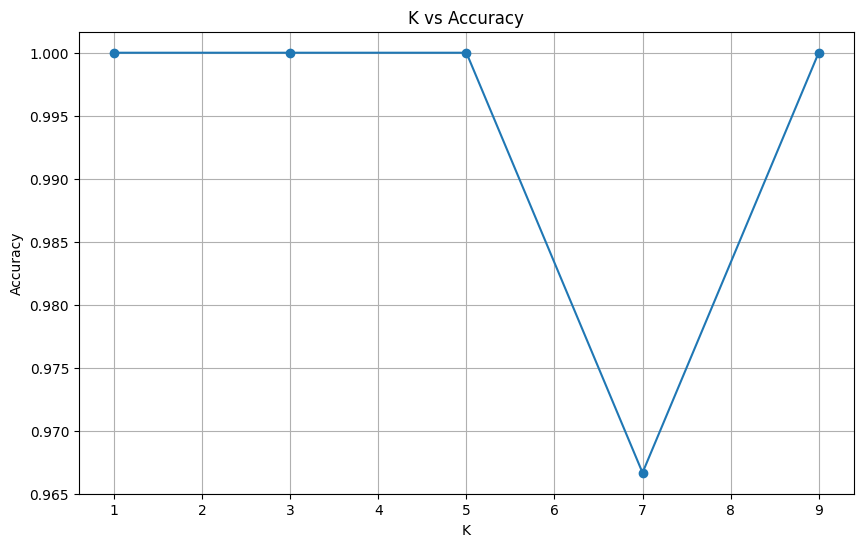


Maximum Accuracy: 1.0000 at k = 1


In [ ]:
import matplotlib.pyplot as plt

accuracy_values = []

for k in k_values:
    y_pred = predict(X_train.values, y_train.values, X_test.values, k)
    acc = accuracy(y_test.values, y_pred)
    accuracy_values.append(acc)

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_values, marker='o')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('K vs Accuracy')
plt.grid(True)
plt.show()

max_acc_index = np.argmax(accuracy_values)
max_acc_k = k_values[max_acc_index]
print(f"\nMaximum Accuracy: {accuracy_values[max_acc_index]:.4f} at k = {max_acc_k}")